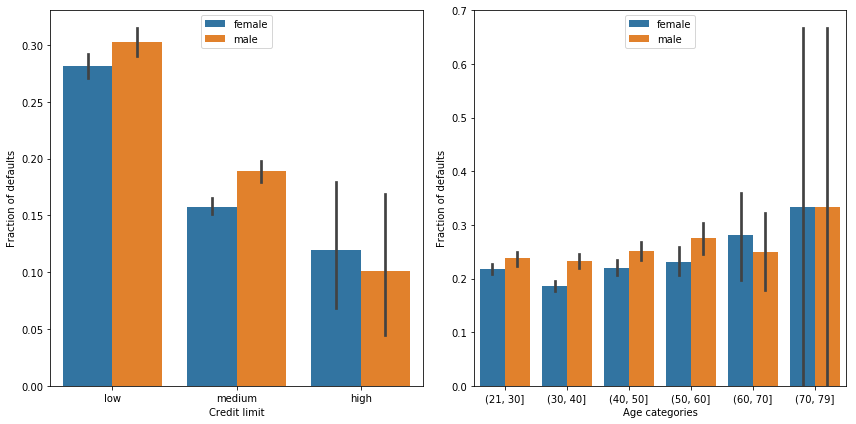

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

path = "cc_default.xls"

df = pd.read_excel(path, skip_rows=0, header=1)

df.rename(columns={'default payment next month': 'default'}, inplace=True)

df.columns = df.columns.str.lower()

df['sex'].replace({2: 'female', 1: 'male'}, inplace=True)

df['default_cat'] = df['default'].replace({1: 'default', 0: 'no default'}, \
                                             inplace=False)

df['pay_0'] = df['pay_0'] + 2

df['pay_2'] = df['pay_2'] + 2

df.corr().iloc[ : , -1]

width = 12
height = 6
plt.figure(figsize=(width, height))

df['limit_cat'] = pd.cut(x=df.limit_bal, bins=[df.limit_bal.min(), 100000, \
                  500000, df.limit_bal.max()], \
                  labels=['low', 'medium', 'high'])

df['age_cat'] = pd.cut(x=df.age, \
                  bins=[df.age.min(), 30, 40, 50, 60, 70, df.age.max()])

plt.subplot(1, 2, 1)

ax_5 = sns.barplot(x='limit_cat', y='default', hue='sex', data=df) 
ax_5.set(xlabel='Credit limit', ylabel='Fraction of defaults')
ax_5.legend(loc='upper center')

plt.subplot(1, 2, 2)

ax_6 = sns.barplot(x='age_cat', y='default', hue='sex', data=df) 
ax_6.set(xlabel='Age categories', ylabel='Fraction of defaults')
ax_6.legend(loc='upper center')

plt.tight_layout()

plt.show()